In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import datetime as dt
import pandas as pd
import numpy as np

from apidata import (
    quandl_stock_data,
    optimize_portfolio,
    closing_prices,
)

In [2]:
stock_selection = [
    "AMZN",
    "PFE",
    "AMD",
    "HAL",
    "PG",
    "COF",    
]

stock_selection

['AMZN', 'PFE', 'AMD', 'HAL', 'PG', 'COF']

In [3]:
portfolio = optimize_portfolio(assets=stock_selection)

[0] Retrieving Stock Data: AMZN
[1] Retrieving Stock Data: PFE
[2] Retrieving Stock Data: AMD
[3] Retrieving Stock Data: HAL
[4] Retrieving Stock Data: PG
[5] Retrieving Stock Data: COF

Optimizing Portfolio Weights >> Simulations: x 5000

Optimized Portfolio Weights:
AMD         0.1613
AMZN        0.6864
COF         0.0699
HAL         0.0492
PFE         0.0012
PG          0.0319
Return      0.2513
Sharpe      0.6162
Variance    0.2488
Name: 1838, dtype: float64


In [4]:
def backtest_portfolio_performance(pfolio):
    exclude = ["Return", "Sharpe", "Variance"]
    assets = [(a,wt) for a, wt in pfolio.items() if a not in exclude]
    
    # Initialize Portfolio Back-Test Performance DataFrame
    back_test = closing_prices(assets[0][0]).set_index("Date")
    back_test = np.log(back_test / back_test.shift(1)).iloc[1:]
    back_test = back_test.apply(lambda x: x * assets[0][1])
    
    for allocation in assets[1:]:
        stock = allocation[0]
        weight = allocation[1]
        print(f'\nTicker: {stock} \tPortfolio Weight: {weight}')
        
        closing_data = closing_prices(stock).set_index("Date")
        pct_return = np.log(closing_data / closing_data.shift(1)).iloc[1:]
        pct_return = pct_return.apply(lambda x: x * weight)
        back_test = pd.merge(back_test, pct_return, on="Date", how="inner")
        print(pct_return.head())
        
    back_test["RTNp"] = back_test.sum(axis=1)
    print("\n[Historic] Portfolio Performance:\n", back_test.head())
    
    return back_test

In [5]:
historic_perform = backtest_portfolio_performance(pfolio=portfolio)


Ticker: AMZN 	Portfolio Weight: 0.6864
                AMZN
Date                
2014-01-03 -0.002644
2014-01-06 -0.004883
2014-01-07  0.007630
2014-01-08  0.006676
2014-01-09 -0.001556

Ticker: COF 	Portfolio Weight: 0.0699
                 COF
Date                
2014-01-03  0.000081
2014-01-06 -0.000681
2014-01-07  0.000627
2014-01-08  0.000514
2014-01-09  0.000000

Ticker: HAL 	Portfolio Weight: 0.0492
                 HAL
Date                
2014-01-03  0.000118
2014-01-06  0.000186
2014-01-07 -0.000117
2014-01-08 -0.000691
2014-01-09  0.000109

Ticker: PFE 	Portfolio Weight: 0.0012
                     PFE
Date                    
2014-01-03  2.361431e-06
2014-01-06  1.178975e-06
2014-01-07  7.440063e-06
2014-01-08  8.169913e-06
2014-01-09 -7.756949e-07

Ticker: PG 	Portfolio Weight: 0.0319
                  PG
Date                
2014-01-03 -0.000036
2014-01-06  0.000075
2014-01-07  0.000307
2014-01-08 -0.000466
2014-01-09  0.000071

[Historic] Portfolio Performance:
       

In [6]:
historic_perform.tail(10)

,AMD,AMZN,COF,HAL,PFE,PG,RTNp
Date,,,,,,,
2018-03-14,-0.003858,0.001218,-0.001155,0.000149,-0.000013,-0.000289,-0.003949
2018-03-15,0.001414,-0.003755,0.000609,-0.001021,0.000008,-0.000134,-0.002880
2018-03-16,0.000141,-0.004631,0.000928,0.000669,0.000007,0.000121,-0.002766
2018-03-19,-0.000563,-0.011783,-0.000501,-0.001336,-0.000015,-0.000125,-0.014324
2018-03-20,-0.004580,0.018229,0.000014,0.000884,0.000000,-0.000142,0.014405
2018-03-21,0.002163,-0.002015,-0.000348,0.001722,-0.000002,-0.000522,0.000999
2018-03-22,-0.005093,-0.016584,-0.002560,-0.000768,-0.000022,-0.000262,-0.025289
2018-03-23,-0.004194,-0.021924,-0.001689,0.000064,-0.000038,-0.000209,-0.027991
2018-03-26,-0.002909,0.027132,0.001999,0.000809,0.000019,0.000209,0.027259


In [7]:
historic_perform.describe()

,AMD,AMZN,COF,HAL,PFE,PG,RTNp
count,1063.000000,1063.000000,1063.000000,1063.000000,1.063000e+03,1063.000000,1063.000000
mean,0.000137,0.000855,0.000012,-0.000002,1.682908e-07,-0.000001,0.001001
std,0.006077,0.012736,0.001044,0.000963,1.321220e-05,0.000279,0.015736
min,-0.045007,-0.079968,-0.009832,-0.005655,-6.533600e-05,-0.001304,-0.083198
25%,-0.002704,-0.004746,-0.000521,-0.000512,-6.372695e-06,-0.000142,-0.006689
50%,0.000000,0.000761,0.000019,-0.000011,0.000000e+00,-0.000004,0.001576
75%,0.002783,0.007090,0.000563,0.000565,6.498304e-06,0.000145,0.009058
max,0.067846,0.090727,0.005738,0.005174,8.193781e-05,0.001162,0.087256


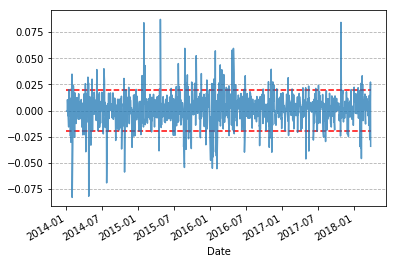

In [8]:
x_min = dt.date(2014, 1, 1)
x_max = dt.date(2018, 3, 27)

historic_perform["RTNp"].plot(alpha=0.75)
plt.grid(axis="y", linestyle="dashed")
plt.hlines(.02, x_min, x_max, color="red", linestyle="dashed")
plt.hlines(-.02, x_min, x_max, color="red", linestyle="dashed")
plt.show()

In [9]:
RTNp = historic_perform["RTNp"]
RTNp.head(10)

Date
2014-01-03   -0.000449
2014-01-06   -0.000142
2014-01-07    0.010395
2014-01-08    0.006041
2014-01-09   -0.004887
2014-01-10   -0.001644
2014-01-13   -0.015722
2014-01-14    0.019994
2014-01-15    0.003275
2014-01-16   -0.003779
Name: RTNp, dtype: float64

In [10]:
type(RTNp)

pandas.core.series.Series

In [ ]:
RTNp.map(lambda x: x + 1)
RTNp.head()